In [ ]:
import dolfin as dl
import hippylib as hl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme(style="ticks")

Text(0, 0.5, '$\\beta$')

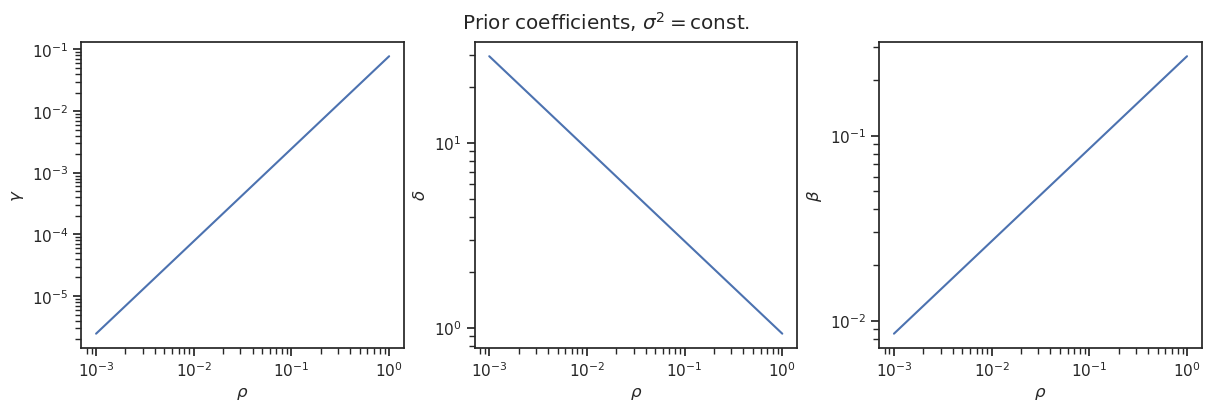

In [4]:
test_variance = 1.0
test_correlation_lengths = np.logspace(-3, 0, num=100)
gamma_list = []
delta_list = []
for correlation_length in test_correlation_lengths:
    gamma, delta = hl.BiLaplacianComputeCoefficients(test_variance, correlation_length, 1)
    gamma_list.append(gamma)
    delta_list.append(delta)
gamma = np.array(gamma_list)
delta = np.array(delta_list)
beta = np.sqrt(gamma * delta)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), layout="constrained")
fig.suptitle(r"Prior coefficients, $\sigma^2 = \text{const.}$")
axs[0].loglog(test_correlation_lengths, gamma)
axs[0].set_xlabel(r"$\rho$")
axs[0].set_ylabel(r"$\gamma$")
axs[1].loglog(test_correlation_lengths, delta)
axs[1].set_xlabel(r"$\rho$")
axs[1].set_ylabel(r"$\delta$")
axs[2].loglog(test_correlation_lengths, beta)
axs[2].set_xlabel(r"$\rho$")
axs[2].set_ylabel(r"$\beta$")

In [3]:
mesh = dl.IntervalMesh(100, -1.5, 1.5)
function_space = dl.FunctionSpace(mesh, "Lagrange", 1)
variance = 1.0
correlation_length = 1.0

In [ ]:
gamma, delta = hl.BiLaplacianComputeCoefficients(variance, correlation_length, 1)
prior = hl.BiLaplacianPrior(function_space, gamma, delta, robin_bc=True)
input_vector = dl.Vector()
prior.R.init_vector(input_vector, 0)
input_vector.set_local(np.ones(input_vector.size()))
output_vector = dl.Vector()
prior.R.init_vector(output_vector, 0)
prior.grad(input_vector, output_vector)

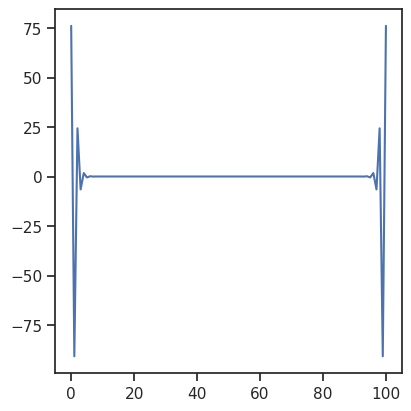

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4), layout="constrained")
ax.plot(output_vector.get_local())
ax.set_title(r"Prior gradient")
ax.set_xlabel(r"$x$")